In [22]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)


df = pd.read_csv("../data/sales_data.csv")
df["Date"] = pd.to_datetime(df["Date"])


In [23]:
df.head()

,CustomerID,Date,LoB,Channel,Product,SalesQty,SalesAmount,CustomerSegment,CostPerUnit,TotalCost
0,C209,2024-06-15,Investment,Branch,EquityMax,6,12594,Corporate,1193,7158
1,C019,2024-02-12,Investment,Branch,GrowthFund,10,16930,Corporate,507,5070
2,C202,2023-07-20,Banking,Branch,LoanX,7,9352,Corporate,1077,7539
3,C024,2025-06-11,Insurance,Branch,TravelCare,11,21010,SME,630,6930
4,C260,2023-11-30,Insurance,Online,HealthPlus,17,37672,Corporate,1167,19839


In [24]:
df.describe()

,Date,SalesQty,SalesAmount,CostPerUnit,TotalCost
count,8000,8000.0000,8000.000000,8000.000000,8000.000000
mean,2024-03-26 11:54:36,10.4760,23391.309375,859.753875,9058.765625
min,2023-01-01 00:00:00,1.0000,502.000000,424.000000,424.000000
25%,2023-08-15 00:00:00,5.0000,9150.000000,630.000000,3966.000000
50%,2024-03-27 00:00:00,11.0000,18910.500000,910.000000,8056.000000
75%,2024-11-01 00:00:00,15.0000,34104.500000,1167.000000,12924.000000
max,2025-06-23 00:00:00,20.0000,79920.000000,1193.000000,23860.000000
std,NaN,5.7487,17645.137039,291.722479,6110.905030


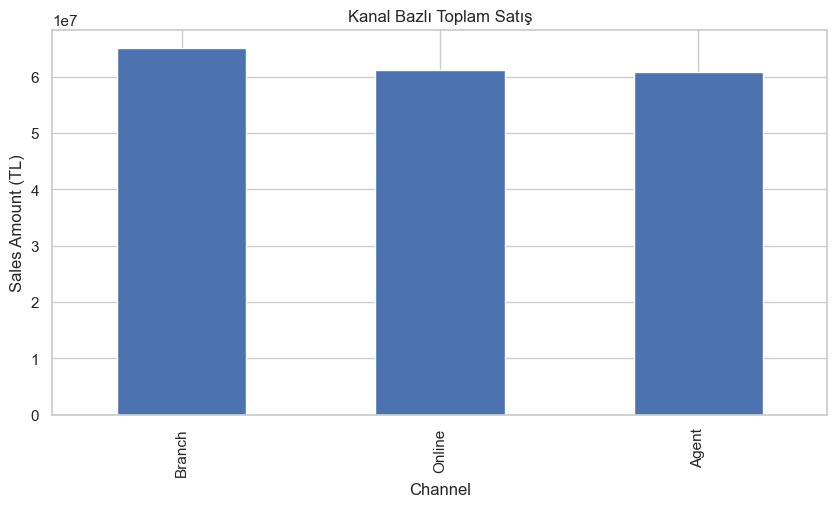

In [25]:
channel_sales = df.groupby("Channel")["SalesAmount"].sum().sort_values(ascending=False)
channel_sales.plot(kind="bar", title="Kanal Bazlı Toplam Satış")
plt.ylabel("Sales Amount (TL)")
plt.xlabel("Channel")
plt.show()

In [26]:
pivot = pd.pivot_table(df, values="SalesAmount", index="LoB", columns="Product", aggfunc="sum")
pivot


Product,BondSafe,CreditLine,EquityMax,GrowthFund,HealthPlus,LifeSecure,LoanX,SavingsPro,TravelCare
LoB,,,,,,,,,
Banking,NaN,19352507.0,NaN,NaN,NaN,NaN,20906356.0,20032108.0,NaN
Insurance,NaN,NaN,NaN,NaN,21972436.0,21108581.0,NaN,NaN,21015613.0
Investment,20455971.0,NaN,21758152.0,20528751.0,NaN,NaN,NaN,NaN,NaN


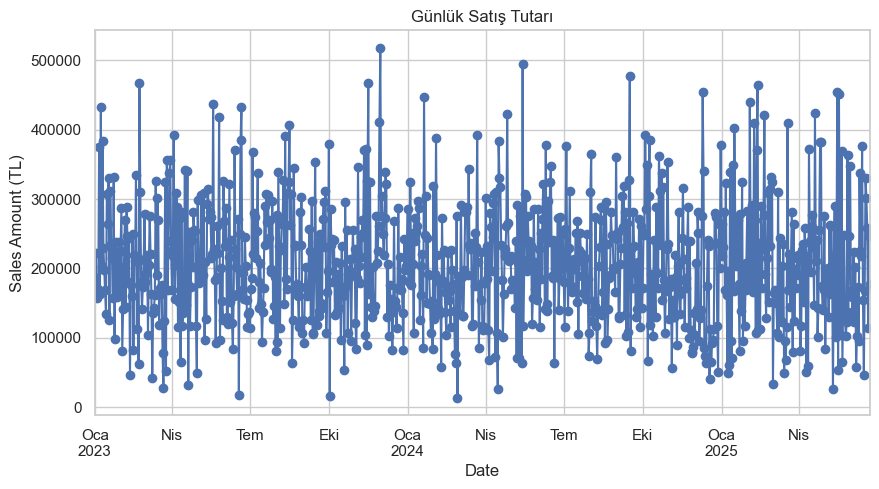

In [27]:
df.groupby("Date")["SalesAmount"].sum().plot(marker='o', title="Günlük Satış Tutarı")
plt.ylabel("Sales Amount (TL)")
plt.xlabel("Date")
plt.show()


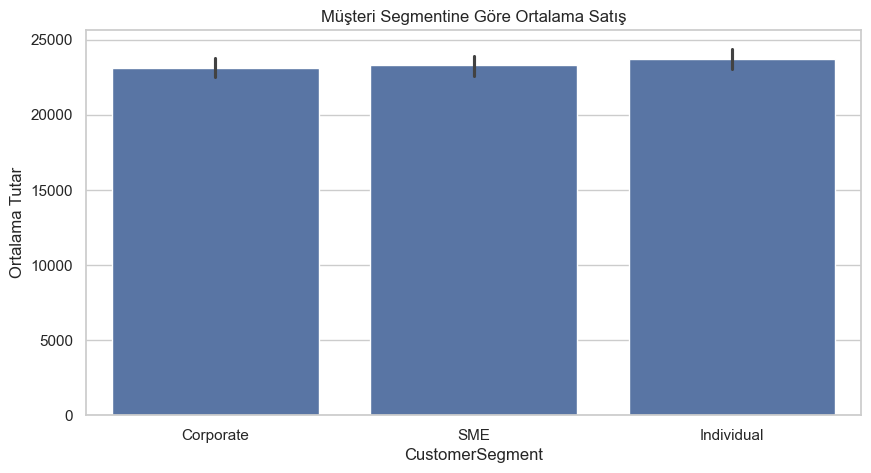

In [28]:
sns.barplot(data=df, x="CustomerSegment", y="SalesAmount", estimator="mean")
plt.title("Müşteri Segmentine Göre Ortalama Satış")
plt.ylabel("Ortalama Tutar")
plt.show()